## Attribute Information

* <h4>AccelSec:</h4> This attribute represents the time in seconds that a vehicle takes to accelerate from 0 to 100 km/h. Lower values are generally preferred as they indicate faster acceleration.

* <h4>TopSpeed_KmH:</h4> This attribute represents the maximum speed that a vehicle can achieve. Higher values are generally preferred as they indicate greater speed.

* <h4>Range_Km:</h4> This attribute represents the maximum distance that a vehicle can travel on a single charge. Higher values are generally preferred as they indicate greater range.

* <h4>Efficiency_WhKm:</h4> This attribute represents the energy consumption of a vehicle in watt-hours per kilometer. Lower values are generally preferred as they indicate better energy efficiency.

* <h4>FastCharge_KmH:</h4> This attribute represents the maximum charging speed of a vehicle in kilometers per hour. Higher values are generally preferred as they indicate faster charging.

* <h4>Seats:</h4> This attribute represents the number of seats in a vehicle. Higher values are generally preferred as they indicate more passenger capacity.

* <h4>Price:</h4> This attribute represents the price of a vehicle. Lower values are generally preferred as they indicate greater affordability.

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

### Reading csv

In [2]:
data=pd.read_csv('C:/Users/divya/Downloads/data_new.csv',usecols=lambda col: col not in ['Unnamed: 0'])
df=data.copy()
df.head()

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0       450              161             940         Yes        AWD   
1       270              167             250          No        RWD   
2       400              181             620         Yes        AWD   
3       360              206             560         Yes        RWD   
4       170              168             190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats       Price  
0  Type 2 CCS      Sedan       D      5  5002354.20  
1  Type 2 CCS  Hatchback       C      5  2704950.00  
2  Type 2 CCS   Liftback       D      5  5088912.60  
3  Type 2 CCS        SUV       D      5  6134826.60  
4  Type 2 CCS  Hatchback       B      4  2975174.51

### Initial Review

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  Price            103 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 11.4+ KB


In [4]:
df.describe()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.000000    103.000000  103.000000       103.000000      103.000000   
mean     7.396117    179.194175  338.786408       189.165049      444.271845   
std      3.017430     43.573030  126.014444        29.566839      203.949253   
min      2.100000    123.000000   95.000000       104.000000      170.000000   
25%      5.100000    150.000000  250.000000       168.000000      260.000000   
50%      7.300000    160.000000  340.000000       180.000000      440.000000   
75%      9.000000    200.000000  400.000000       203.000000      555.000000   
max     22.400000    410.000000  970.000000       273.000000      940.000000   

            Seats         Price  
count  103.000000  1.030000e+02  
mean     4.883495  5.033056e+06  
std      0.795834  3.077267e+06  
min      2.000000  1.814931e+06  
25%      5.000000  3.104336e+06  
50%      5.000000  4.057425e+06  
75%      5.000000  5.860725e+06  
max      7.000000  1.938548e+07

In [5]:
df = df.astype({'Brand': str, 'Model': str})
df['Model_Brand']=df['Brand']+df['Model']
df.drop(['Brand','Model'],axis=1,inplace=True)

In [6]:
df.head()

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
0       4.6           233       450              161             940   
1      10.0           160       270              167             250   
2       4.7           210       400              181             620   
3       6.8           180       360              206             560   
4       9.5           145       170              168             190   

  RapidCharge PowerTrain    PlugType  BodyStyle Segment  Seats       Price  \
0         Yes        AWD  Type 2 CCS      Sedan       D      5  5002354.20   
1          No        RWD  Type 2 CCS  Hatchback       C      5  2704950.00   
2         Yes        AWD  Type 2 CCS   Liftback       D      5  5088912.60   
3         Yes        RWD  Type 2 CCS        SUV       D      5  6134826.60   
4         Yes        RWD  Type 2 CCS  Hatchback       B      4  2975174.51   

                           Model_Brand  
0  Tesla Model 3 Long Range Dual Motor  
1                 Volkswagen ID.3 Pure  
2                           Polestar 2  
3                             BMW iX3   
4                             Honda e

### Exploration

In [7]:
cat_column=['RapidCharge','PowerTrain','PlugType','BodyStyle','Segment','Seats']

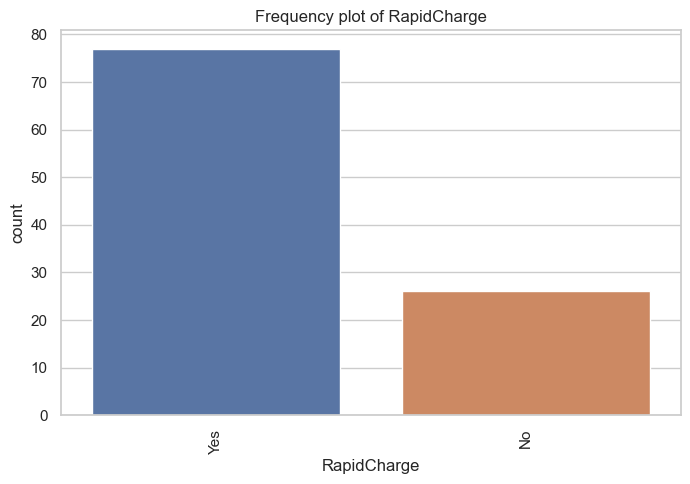

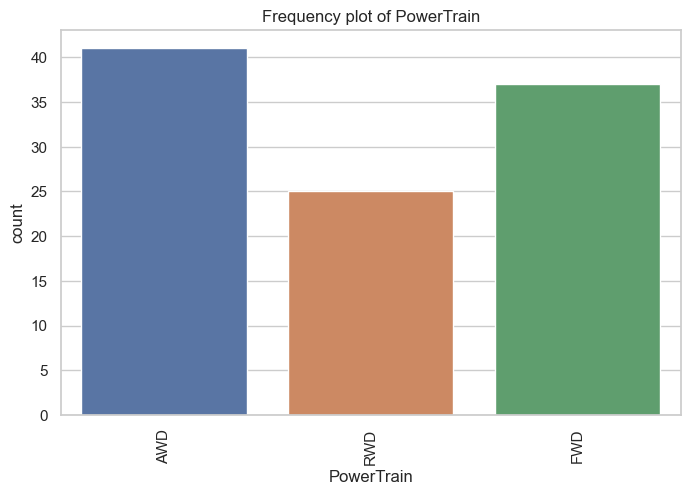

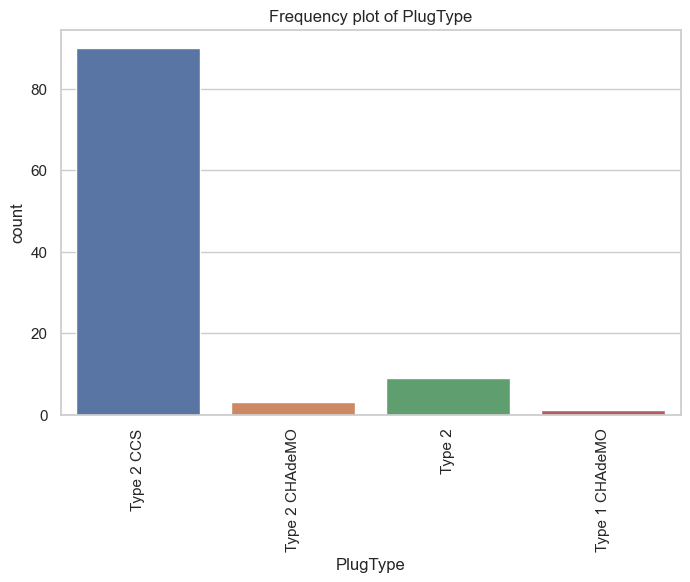

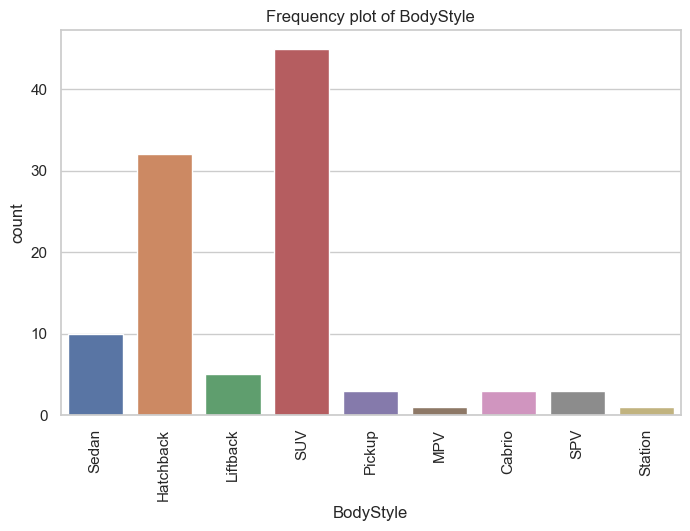

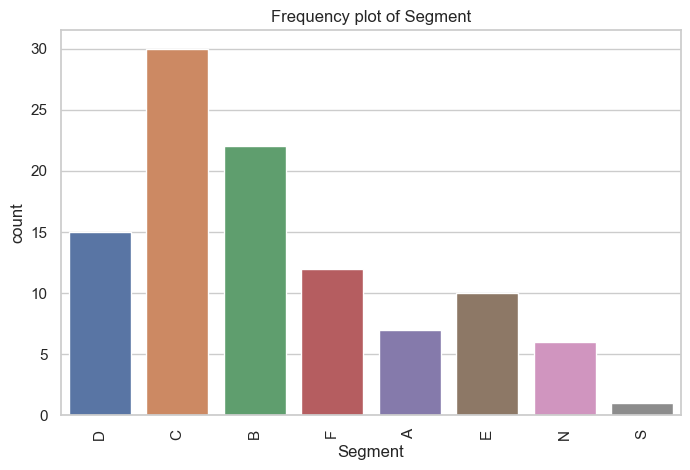

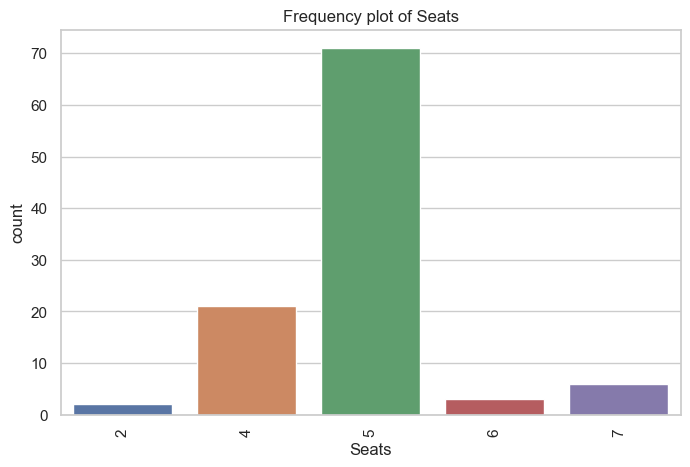

In [8]:
for attribute in cat_column:
    sns.set(style='whitegrid')
    plt.figure(figsize=(8,5))
    sns.countplot(df[attribute])
    plt.xticks(rotation=90)
    plt.title(f'Frequency plot of {attribute}')
    plt.show()

<h4>Interpretation</h4>

* There are a greater amount of rapid charge EV vehicles.
* The AWD power train of vehicles are in large number.
* Type 2 CCS plug type vehicles are larger in number.
* The SUVs are in a large number.
* C(Medium Segment) vehicles are in abundance.
* Most of the vehicles have 5 seats.

In [9]:
df['Seats']=df['Seats'].astype('str')

In [10]:
df['RapidCharge']=df['RapidCharge'].map({'Yes':1,'No':0})

In [11]:
# high value preferred columns 
num_column=['TopSpeed_KmH','Range_Km','FastCharge_KmH']

num_df=df[num_column]
num_df.set_index(keys=df.Model_Brand,inplace=True)

In [12]:
def plot_num_att(att):
    top_val = num_df[att].sort_values(ascending=False)[:10]
    sns.set(style='whitegrid')
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_val.index, y=top_val)
    plt.xticks(rotation=90)
    plt.title(f'Bar plot of {att}')
    plt.show()

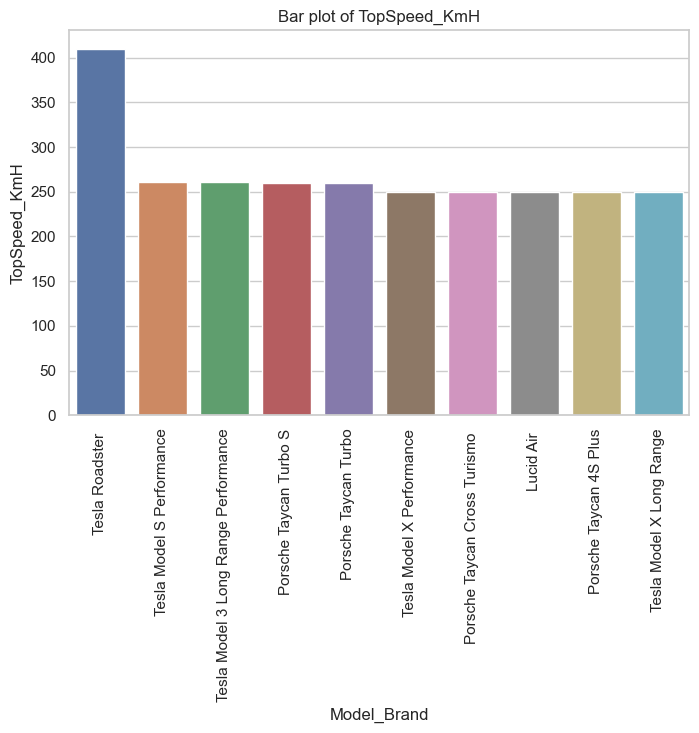

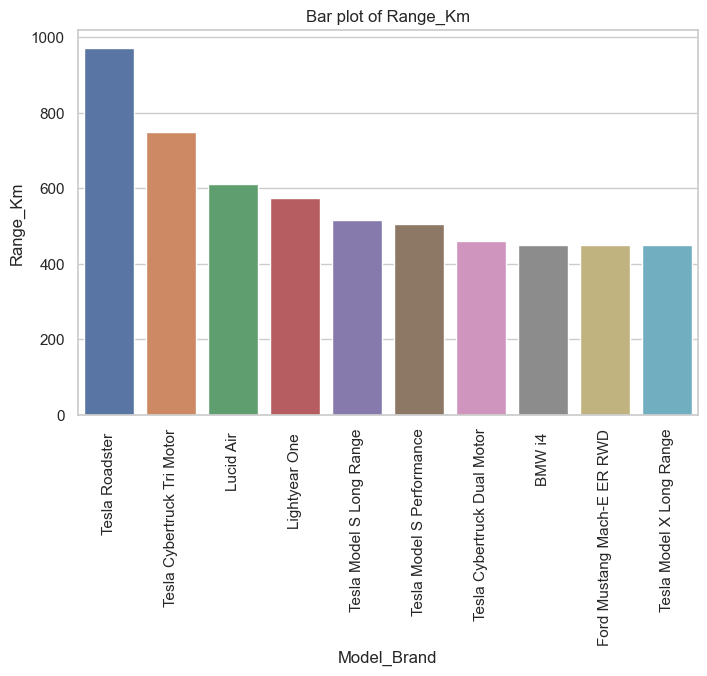

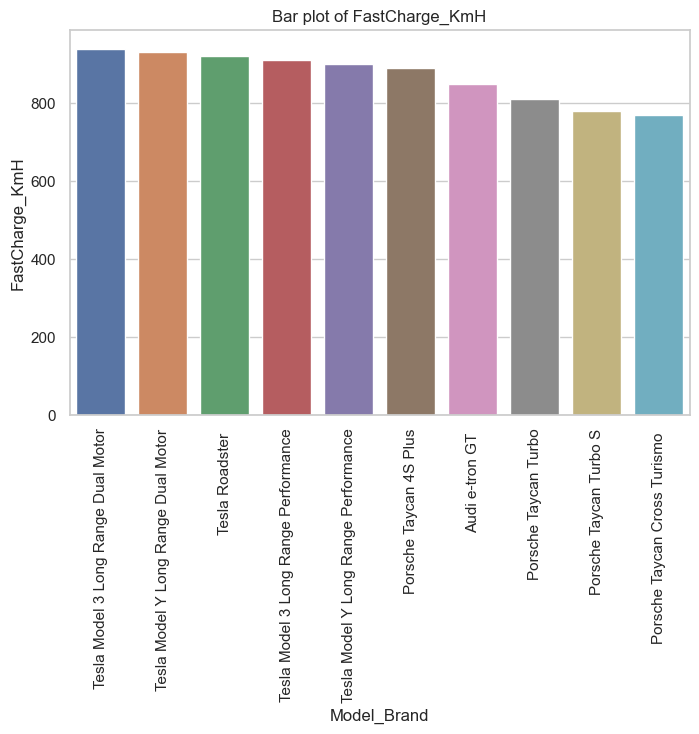

In [13]:
for att in num_column:
    plot_num_att(att)

<h4>Interpretation</h4>

 * Tesla Roadster is the <span style="color:green">fastest</span> among all.
 * Again Tesla Roadster has the <span style="color:green">highest</span> range/km ratio, followed by tesla cybertruck and lucid air.
 * The vehicles Tesla model 3 long range, tesla y long range and tesla roadster have the <span style="color:green">highest</span> fast charge efficiency. 

In [14]:
df.columns

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'Price', 'Model_Brand'],
      dtype='object')

In [15]:
# low values preferred columns
num_column=['AccelSec','Efficiency_WhKm','Price']
num_df=df[num_column]
num_df.set_index(keys=df.Model_Brand,inplace=True)

In [16]:
def plot_num_att(att):
    top_val = num_df[att].sort_values()[:10]
    sns.set(style='whitegrid')
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_val.index, y=top_val)
    plt.xticks(rotation=90)
    plt.title(f'Bar plot of {att}')
    plt.show()

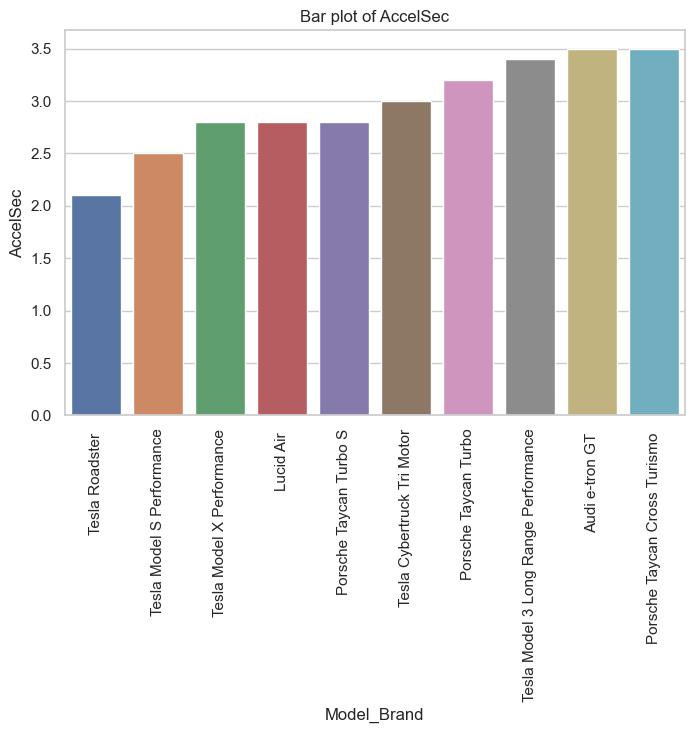

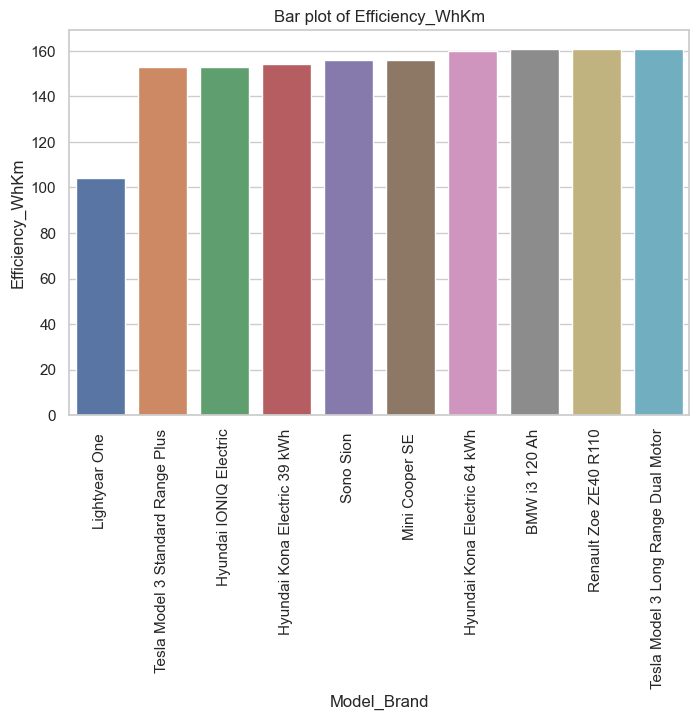

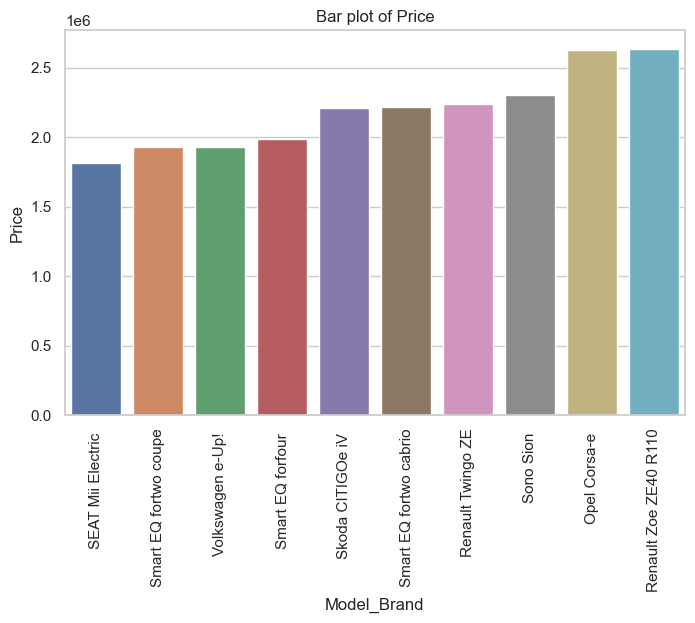

In [17]:
for att in num_column:
    plot_num_att(att)

<h4>Interpretation</h4>

 * Tesla Roadster has the <span style="color:green">lowest</span> acclereation second among all.
 * Lightyear One has the <span style="color:green">lowest</span> efficiency WhKm, which means it is most efficient.
 * The vehicles seat mini, smart eq, volkswagon e-up and smart eq four have the <span style="color:green">lowest</span> prices.

## Checking Outliers

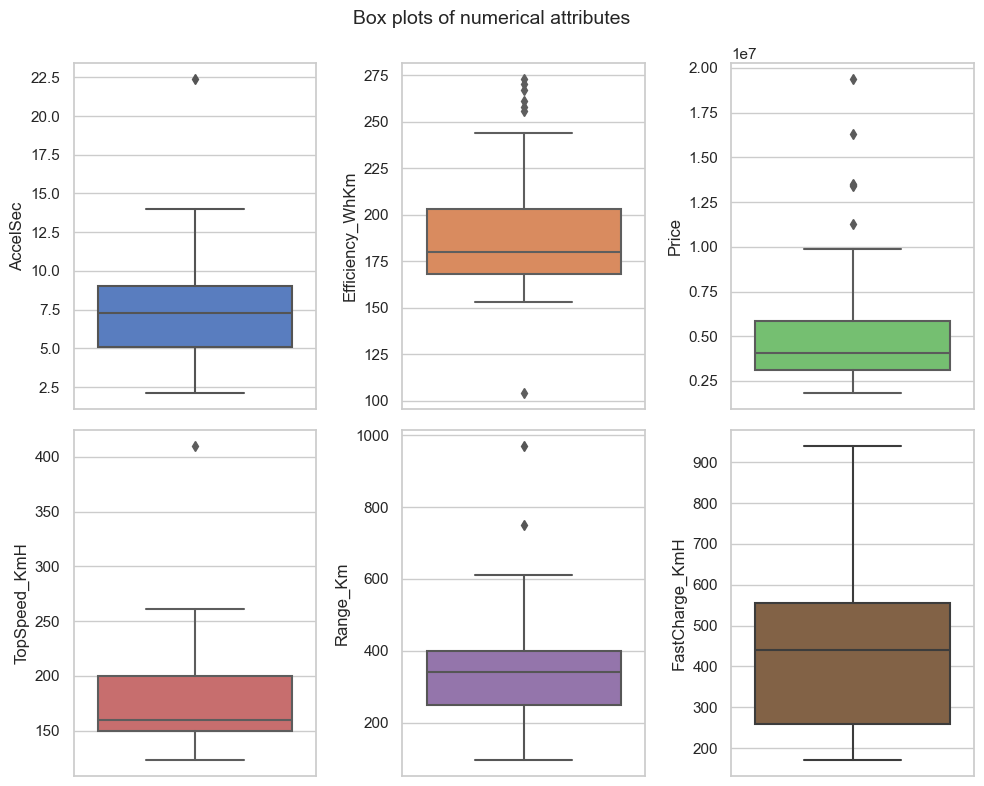

In [18]:
num_attributes = ['AccelSec', 'Efficiency_WhKm', 'Price', 'TopSpeed_KmH', 'Range_Km', 'FastCharge_KmH']

sns.set(style='whitegrid')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

colors = sns.color_palette('muted', n_colors=len(num_attributes))

for i, attribute in enumerate(num_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot( y='value', data=pd.melt(df[[attribute]]), ax=axs[row, col], color=colors[i])
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel(attribute)

fig.suptitle('Box plots of numerical attributes', fontsize=14)
plt.tight_layout()
plt.show()

* Except FastCharge every other attribute has outliers present

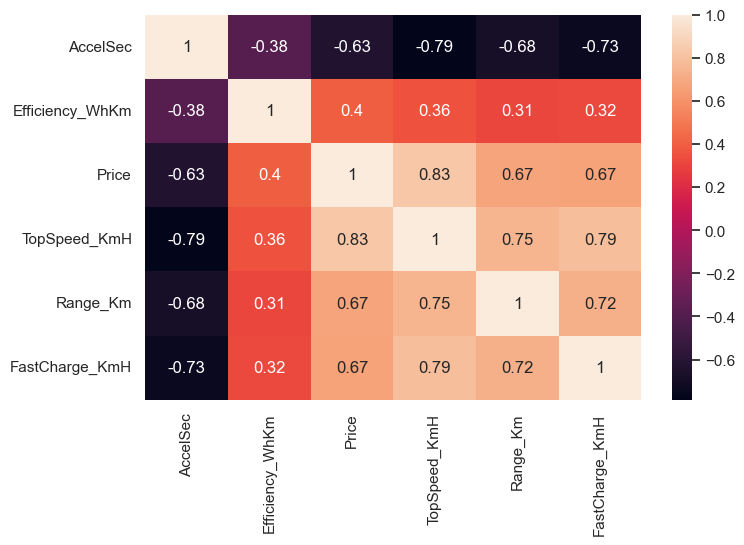

In [19]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(df[num_attributes].corr(),annot=True)
plt.show()

There is a strong <span style="color:green">positive</span> correlation between:
* Price and Fast_charge.
* Price and Range_km.
* Price and Top Speed.
* Top Speed and Fast Charge.
* Top Speed and Range km.
* Range_km and Fast charge.

There is a <span style="color:red">negative</span> correlation between:
* Accel_sec is negatively correlated with every other attribute.

### Multivariate Analysis

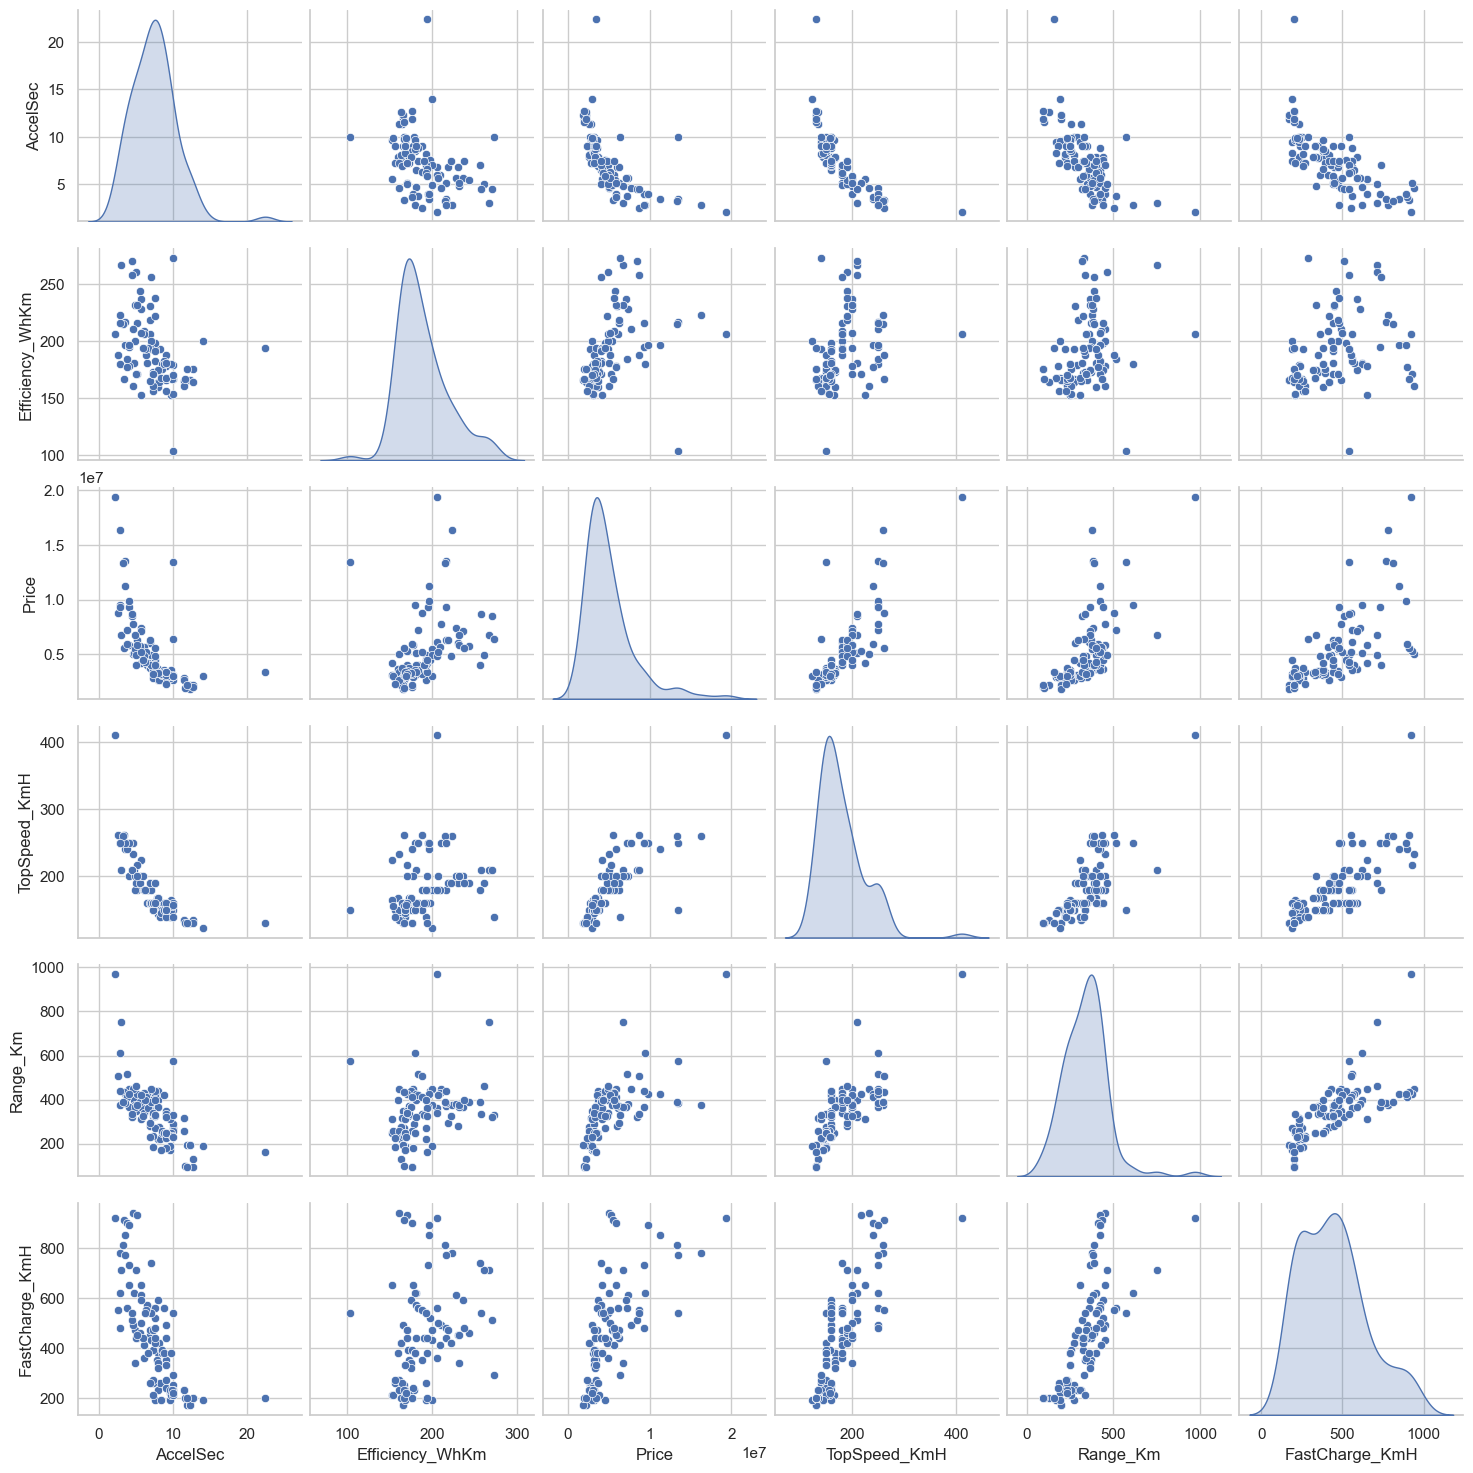

In [20]:
sns.pairplot(df[num_attributes],diag_kind='kde')
plt.show()

In [21]:
def check_skweness(df,columnName):
    
    try:
        (mu, sigma) = norm.fit(df[columnName])
    except RuntimeError:
        (mu,sigma) = norm.fit(df[columnName].dropna())
    print("Mu {} : {}, Sigma {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20,10))
    sns.distplot(df[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot", color="black")
    plt.show()

Mu ACCELSEC : 7.39611650485437, Sigma ACCELSEC : 3.0027470377696464


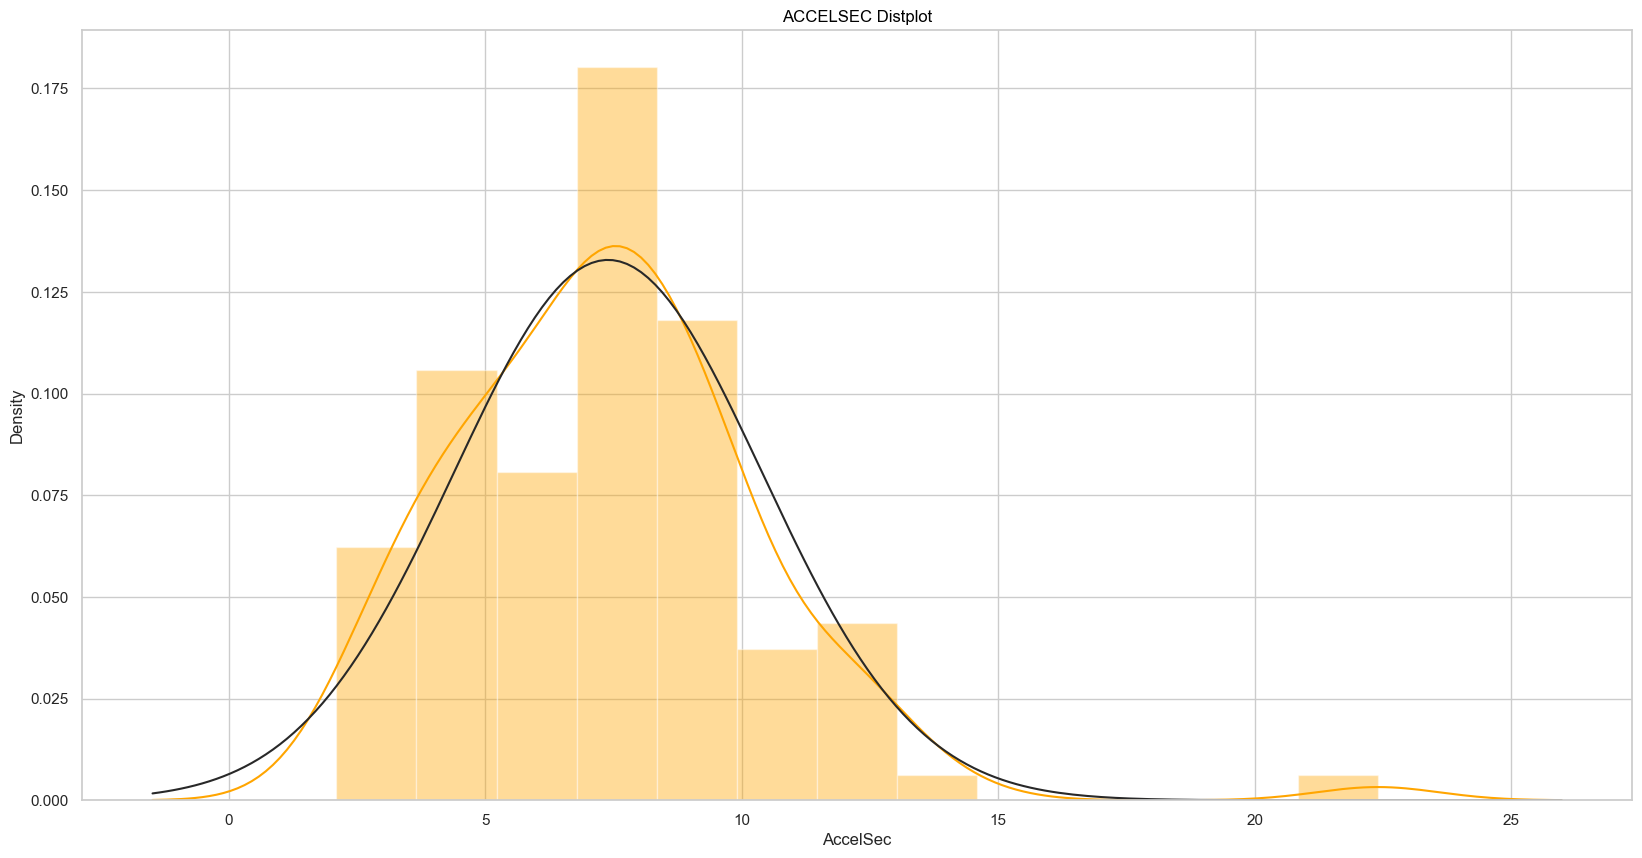

Mu EFFICIENCY_WHKM : 189.16504854368932, Sigma EFFICIENCY_WHKM : 29.42296081389322


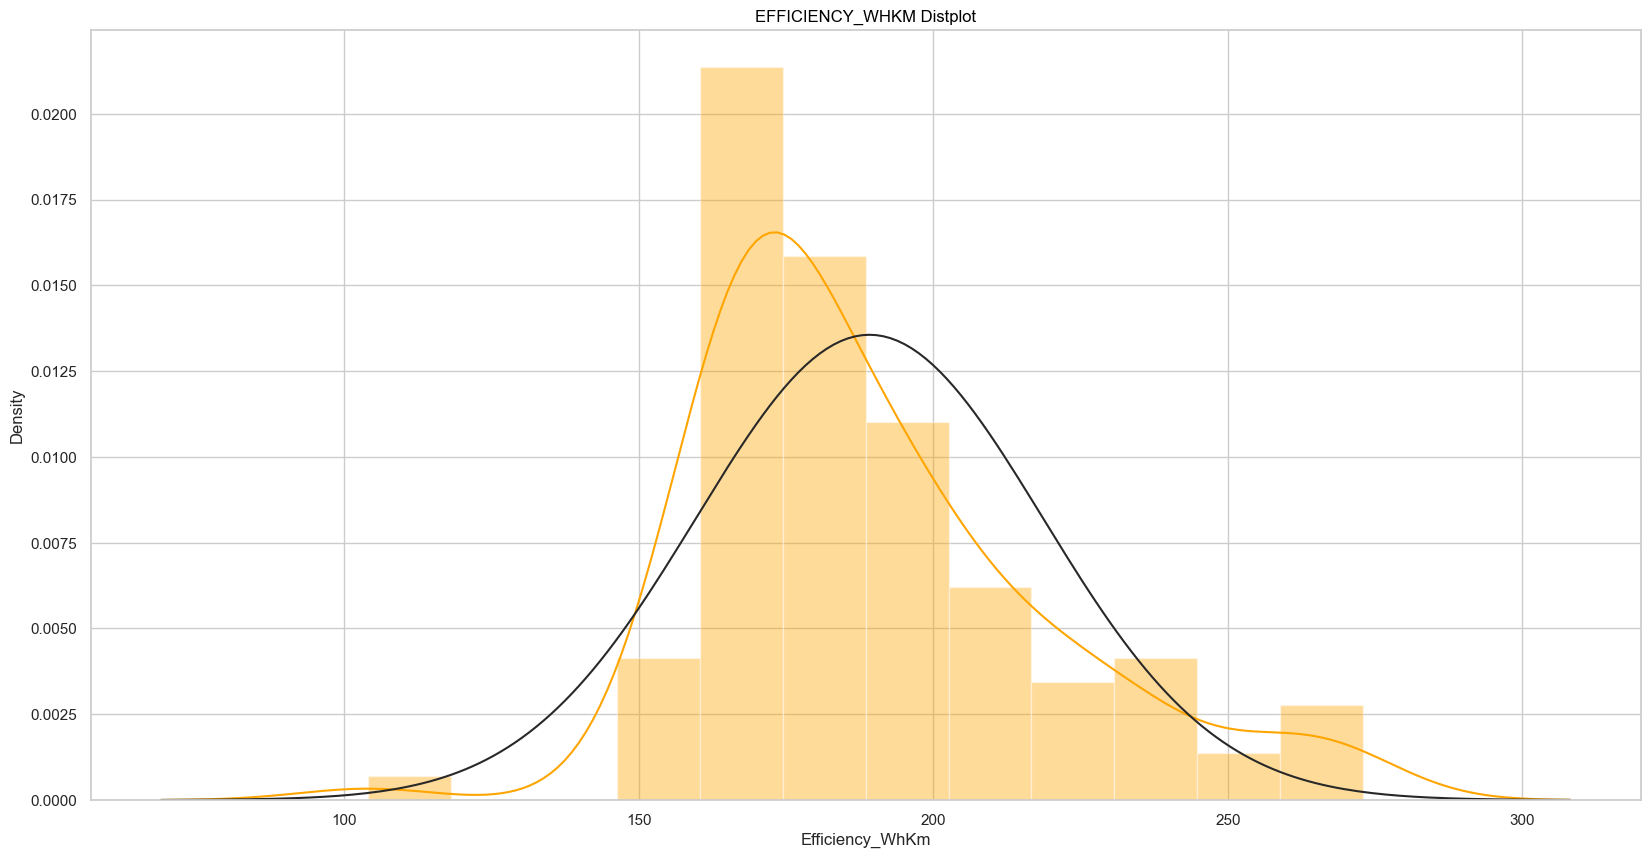

Mu PRICE : 5033055.821747573, Sigma PRICE : 3062291.940017147


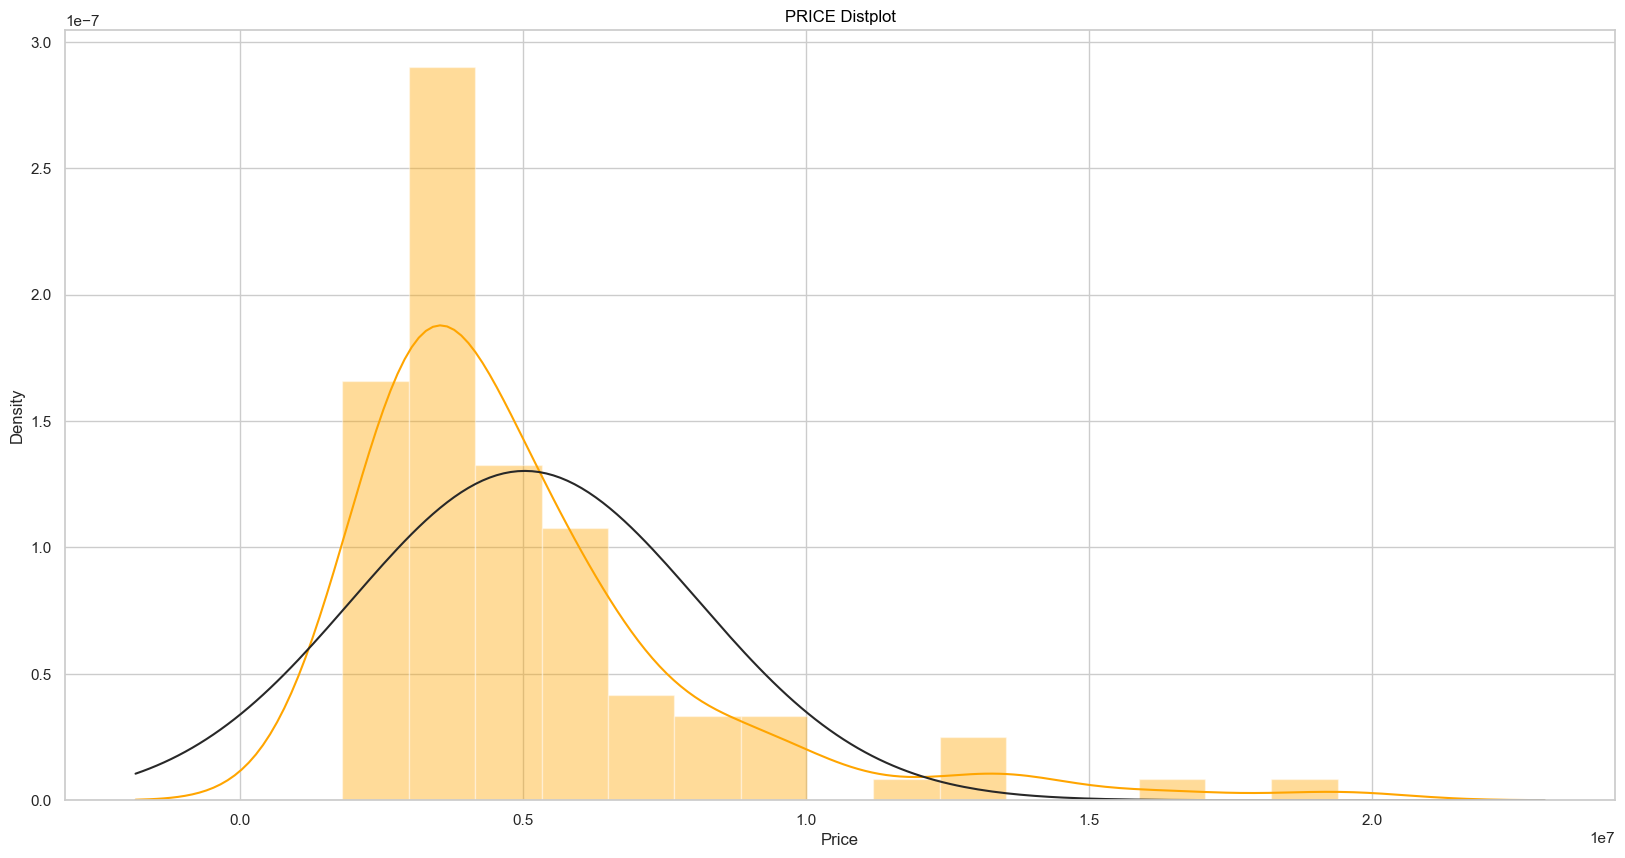

Mu TOPSPEED_KMH : 179.19417475728156, Sigma TOPSPEED_KMH : 43.36099501160743


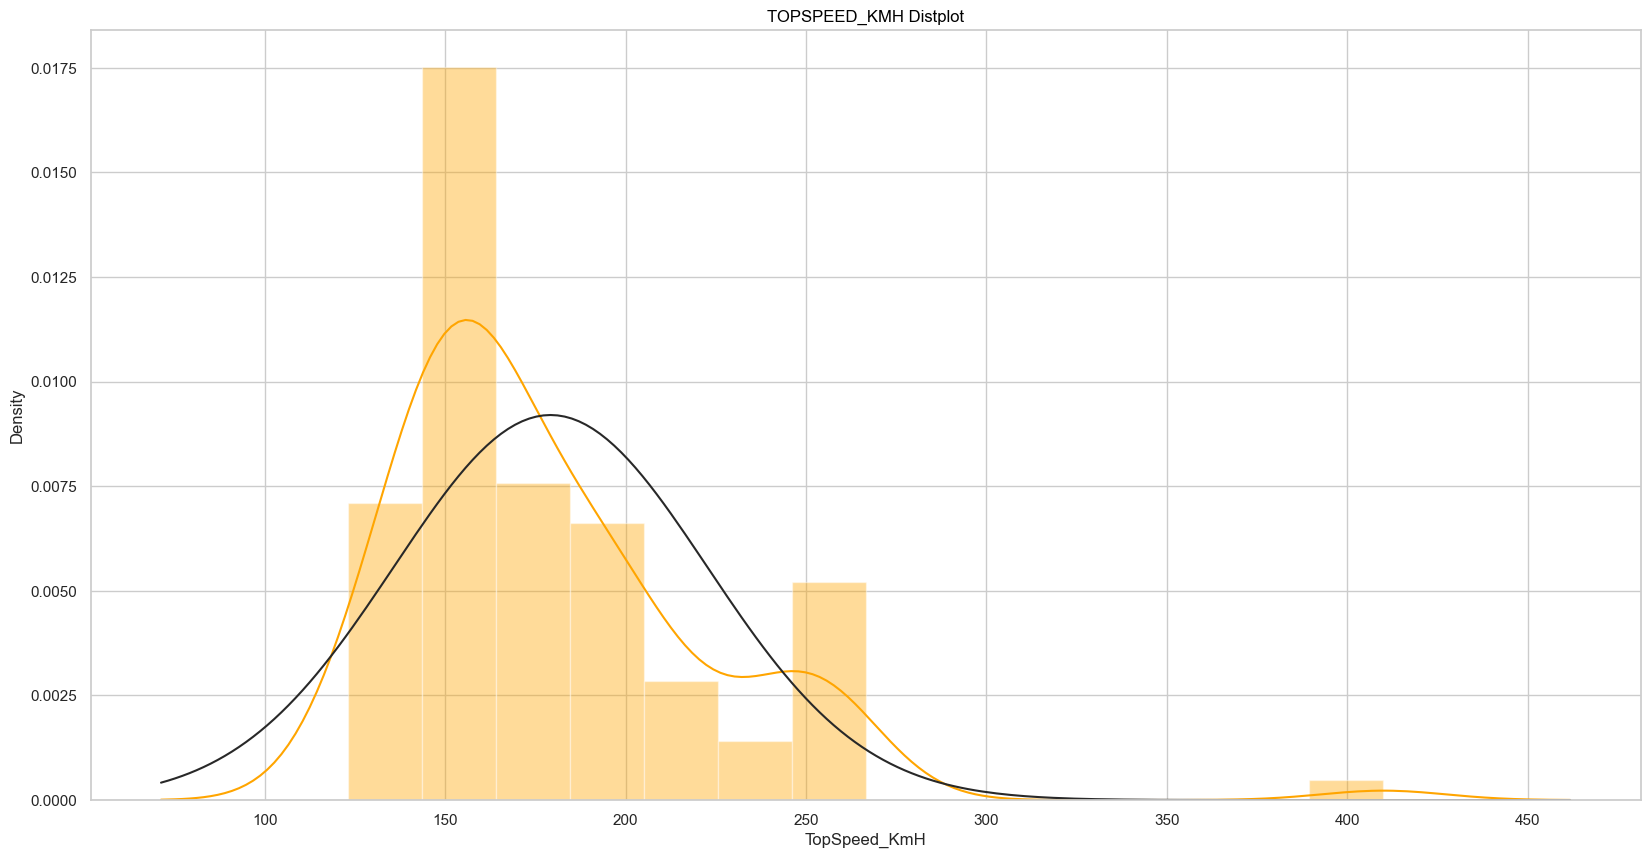

Mu RANGE_KM : 338.7864077669903, Sigma RANGE_KM : 125.40123181797216


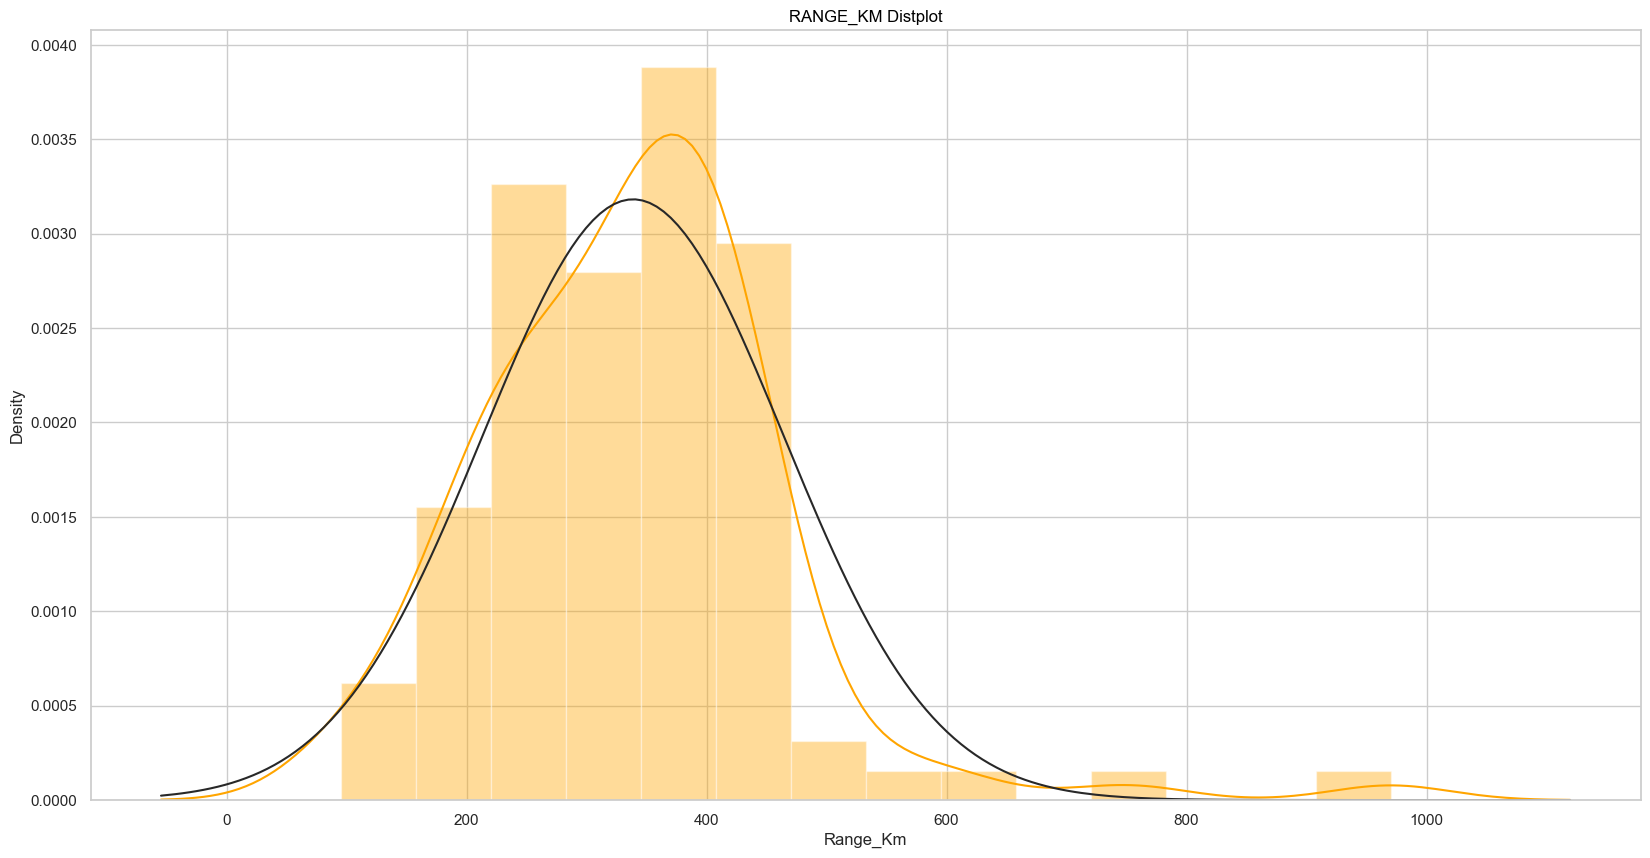

Mu FASTCHARGE_KMH : 444.2718446601942, Sigma FASTCHARGE_KMH : 202.95679363121414


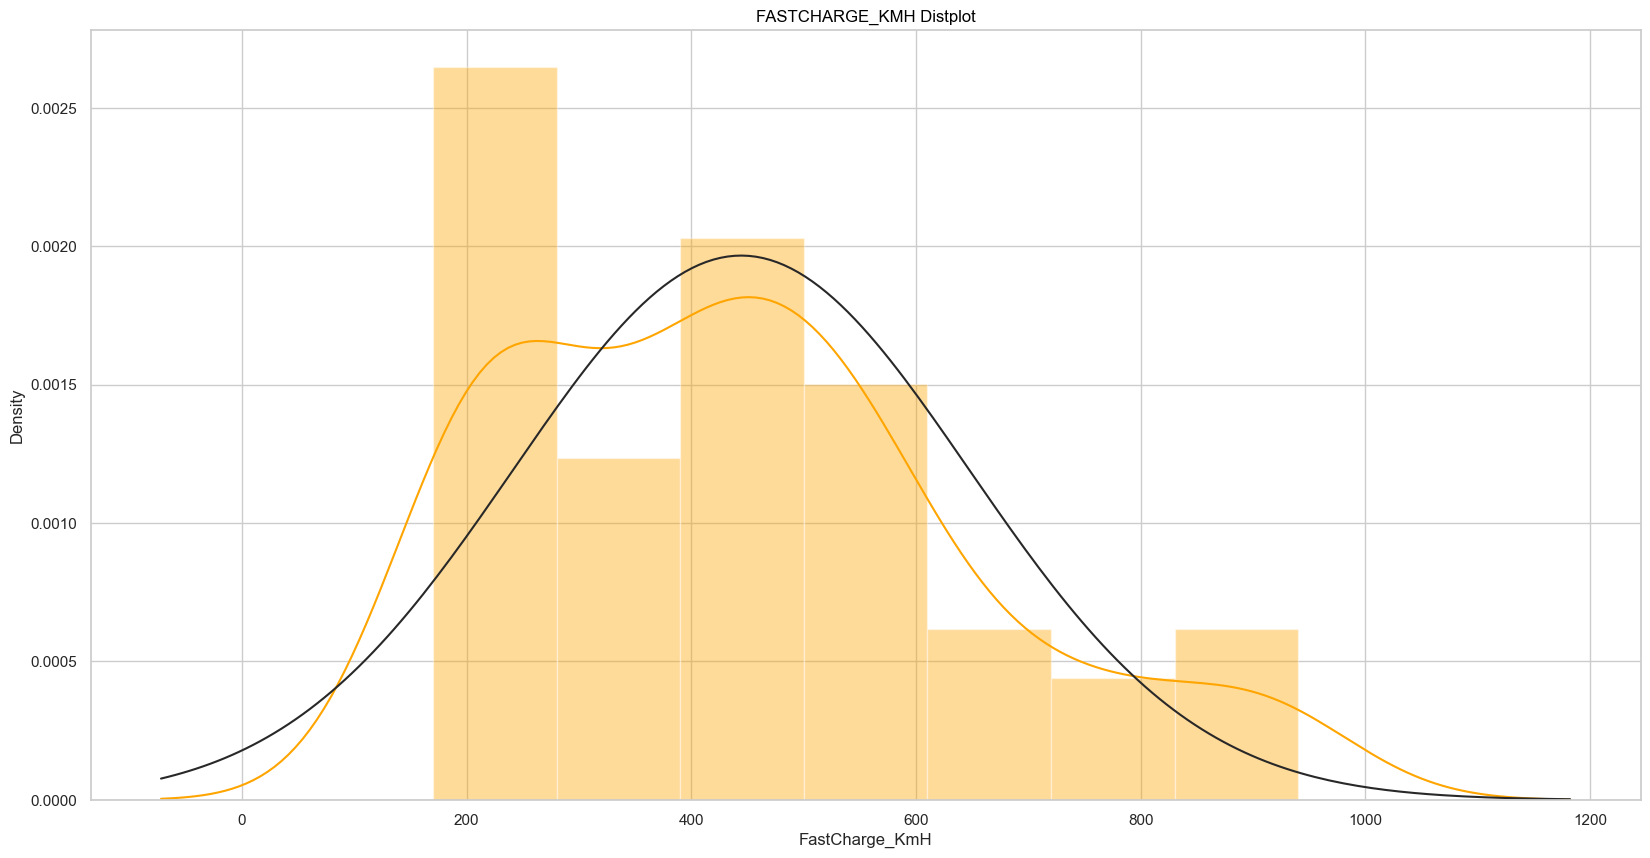

In [22]:
for columns in df[num_attributes].columns:
    check_skweness(df[num_attributes],columns)

* The numerical attributes are mostly normally distributed.

## Cluster Analysis

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

In [24]:
cat_column=['PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats']

### Determining optimal cluster solution

### K Means clustering

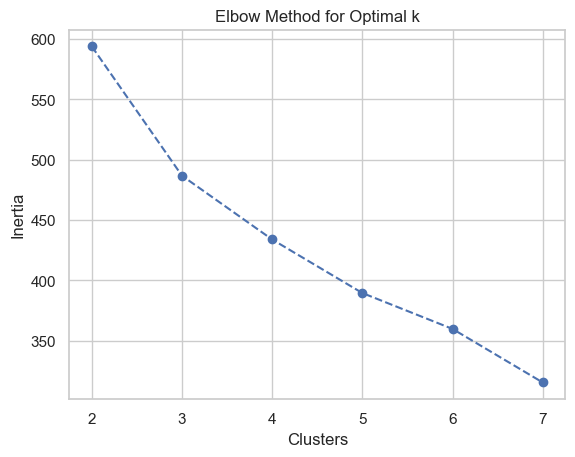

In [25]:
elbow = dict()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in num_attributes]),  
        ('cat', OneHotEncoder(), [col for col in cat_column])  
    ])

for i in range(2,8):

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('estimator', KMeans(n_clusters=i))
        
    ])
    clusters = pipeline.fit_predict(df)
    kmeans_estimator = pipeline.named_steps['estimator'] 
    elbow[i] = kmeans_estimator.inertia_
    
#Plotting Elbow plot    
plt.plot(*zip(*elbow.items()), marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.ylabel('Inertia')
plt.xlabel('Clusters');

In this elbow plot k=4 seems the optimal solution

#### Choosing n_clusters=4 as optimal solution

In [26]:
pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('estimator', KMeans(n_clusters=4))
        ])

df['Labels'] = pipeline.fit_predict(df)


In [27]:
df['RapidCharge']=df['RapidCharge'].map({1:'Yes',0:'No'})

## Studying Segments

In [28]:
df['Seats']=df['Seats'].astype('int')
df.groupby('Labels').mean()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
Labels                                                                         
0        6.216667    185.416667  380.694444       211.194444      510.555556   
1       12.681818    132.545455  154.090909       173.727273      189.090909   
2        8.660526    153.447368  278.815789       170.894737      313.684211   
3        3.855556    249.611111  494.444444       193.111111      743.333333   

           Seats         Price  
Labels                          
0       5.055556  5.361855e+06  
1       4.000000  2.451013e+06  
2       4.868421  3.184689e+06  
3       5.111111  9.855480e+06

The previous attribute information provides that:
* Lower values <span style="color:green">AccelSec</span> are generally preferred as they indicate faster acceleration.
* Higher values <span style="color:green">TopSpeed_KmH</span> are generally preferred as they indicate greater speed.
* Higher values <span style="color:green">Range_Km</span> are generally preferred as they indicate greater range.
* Lower values <span style="color:green">Efficiency_WhKm</span> are generally preferred as they indicate better energy efficiency.
* Higher values <span style="color:green">FastCharge_KmH</span> are generally preferred as they indicate faster charging.
* Lower values <span style="color:green">Price</span> are generally preferred as they indicate greater affordability.
* Higher values <span style="color:green">Seats</span> are generally preferred as they indicate more passenger capacity.

#### Renaming labels

In [29]:
df['Labels']=df['Labels'].map({1:'High1-Range',2:'High2-Range',3:'Mid-Range',0:'Low-Range'})

## Visualising Clusters

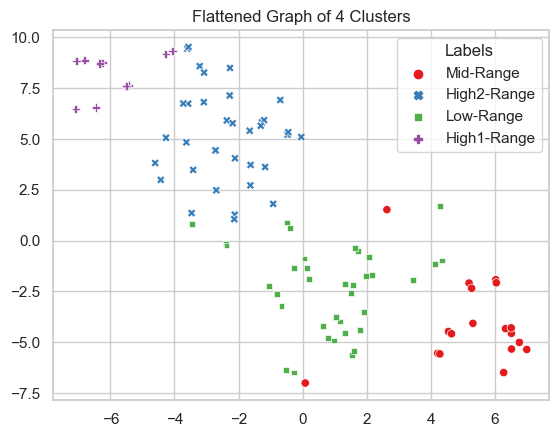

In [30]:
from sklearn.manifold import TSNE
def Visualise_cluster(data):
    
    model = TSNE(random_state=1)
    transformed = model.fit_transform(preprocessor.fit_transform(data))
    
    plt.title('Flattened Graph of 4 Clusters')
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=data['Labels'], style=data['Labels'], palette="Set1")
    
Visualise_cluster(df)

<h4>Interpretation :</h4>

The market is majorly dominated by mid range and a mix of high and mid car models, whereas the low end and the high end vehicles are present in fewer number.

### Ward Linkage

In [31]:
df1=data.copy()
df1 = df1.astype({'Brand': str, 'Model': str})
df1['Model_Brand']=df1['Brand']+df1['Model']
df1.drop(['Brand','Model'],axis=1,inplace=True)
df1['Seats']=df1['Seats'].astype('str')
df1['RapidCharge']=df1['RapidCharge'].map({'Yes':1,'No':0})

In [32]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [33]:
ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
clusters_customers = ward.fit_predict(preprocessor.fit_transform(df1))

In [34]:
def plot_dendrogram(model, **kwargs):
    # create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

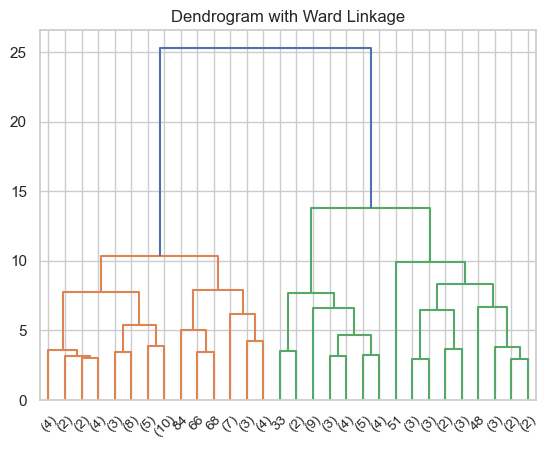

In [35]:
plt.title('Dendrogram with Ward Linkage')
plot_dendrogram(ward, truncate_mode='lastp')

* According to the dendrogram 2 cluster solution is appropriate, in case of Ward's Linkage

In [36]:
pipeline1 = Pipeline([
            ('preprocessor', preprocessor),
            ('estimator', AgglomerativeClustering(distance_threshold=None, n_clusters=2, linkage='ward'))
        ])

df1['Labels']=pipeline1.fit_predict(df1)

In [37]:
df1['RapidCharge']=df1['RapidCharge'].map({1:'Yes',0:'No'})

## Studying Segments

In [38]:
df1['Seats']=df1['Seats'].astype('int')
df1.groupby('Labels').mean()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
Labels                                                                        
0       5.102083    213.083333  419.375000       205.958333      597.291667   
1       9.398182    149.618182  268.454545       174.509091      310.727273   

           Seats         Price  
Labels                          
0       5.083333  7.169506e+06  
1       4.709091  3.168518e+06

* The above labels suggest that label 0 are high end vehicles.
* The label 1 has vehicles that fall under mid-end section vehicles.

#### Renaming Labels

In [39]:
df1['Labels']=df1['Labels'].map({1:'Mid-Range',0:'High-Range'})

## Visualising Clusters

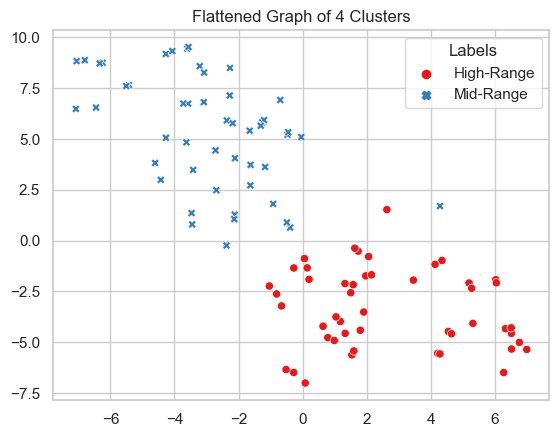

In [40]:
Visualise_cluster(df1)

* For a two cluster solution the market is evenly distributed for High and Mid range 